In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset has 7043 rows and 21 columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have only 3 features as numerical rest others are all categorical. Our target feature is also categorical

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Lets the check all columns

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

CustomerID is giving sequence number so no need of this column.

In [7]:
df.drop(['customerID'],axis=1,inplace=True)

Lets check all the features values

In [8]:
# Get unique and top values for the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Possibilities of outliers may be less,as we can see that the difference between the max and the 75th percentile is very less

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: 

Here Churn is the target featureaving only 2 class yes and no

Let's check for the null values in the dataset.

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

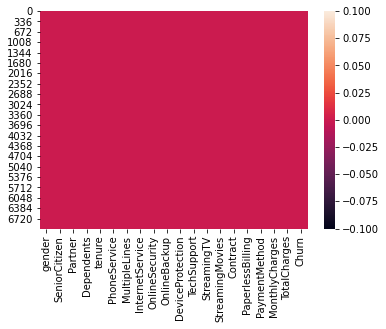

In [11]:
sns.heatmap(df.isnull())

From the above data we can verify that our data has no Null values.

<AxesSubplot:>

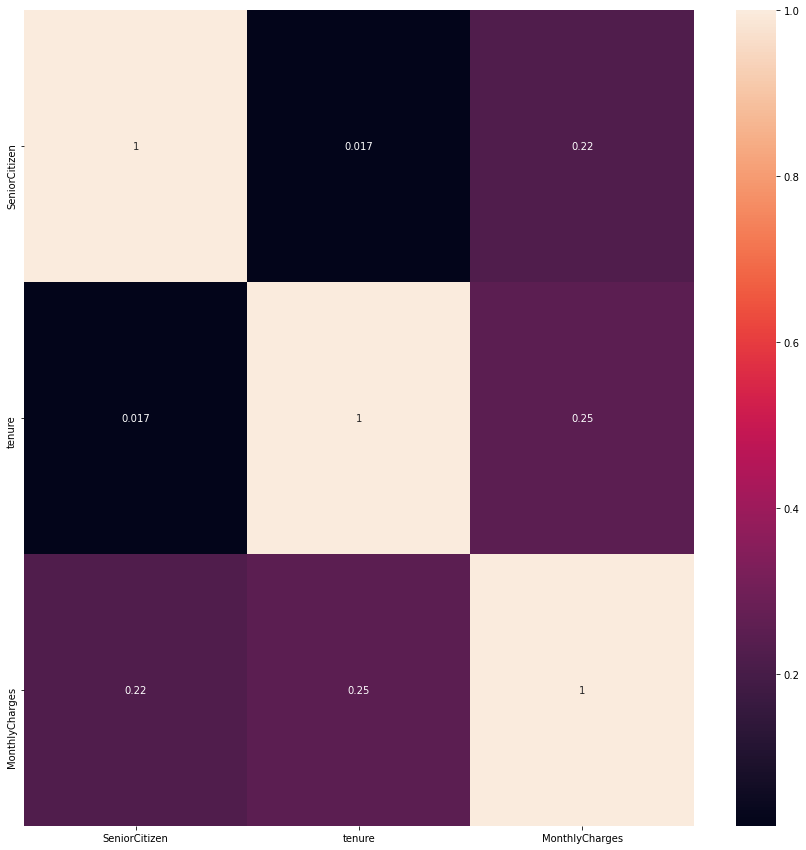

In [12]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

Since most of the features are categorical we have only few data to check corelation.

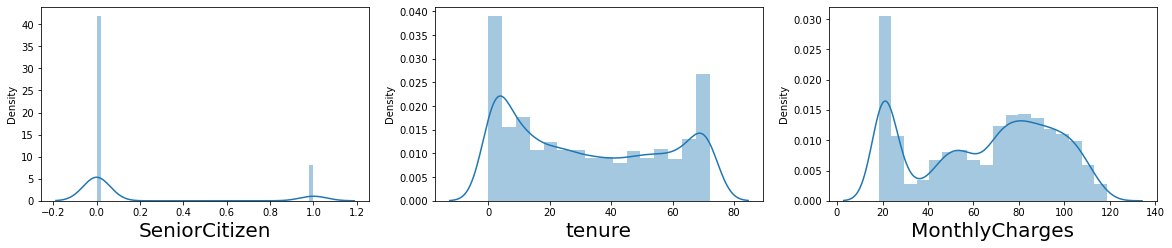

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.describe().columns:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:ylabel='Churn'>

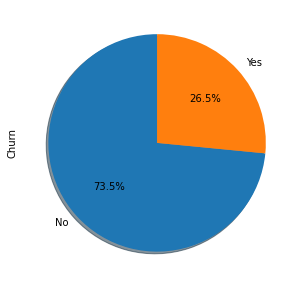

In [14]:
df['Churn'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%',shadow=True,startangle=90)

In the given dataset 26.5% of the customer leaves the services.

<AxesSubplot:ylabel='gender'>

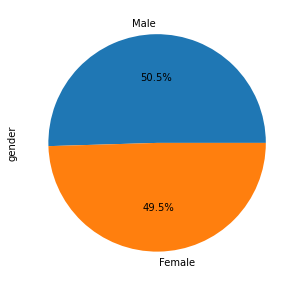

In [15]:
df['gender'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

The data is equally distributed among Male and Female.

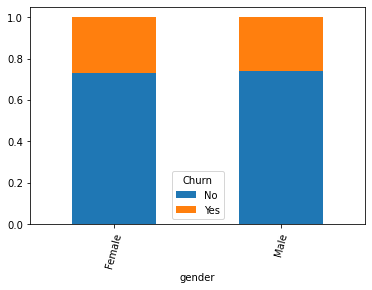

In [16]:
s= pd.crosstab(df.gender, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Gender plays no role whether the customer will leave the service or not.

<AxesSubplot:ylabel='SeniorCitizen'>

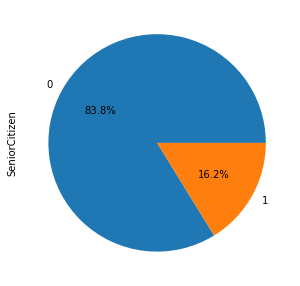

In [17]:
df['SeniorCitizen'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

16.2% of the customer are senior citizens.

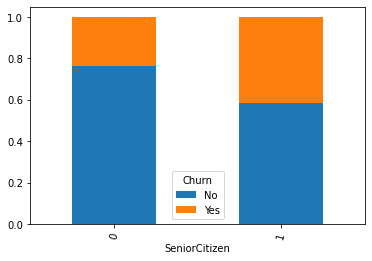

In [18]:
s= pd.crosstab(df.SeniorCitizen, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Senior citizen are more likely to leave the services.

<AxesSubplot:ylabel='Partner'>

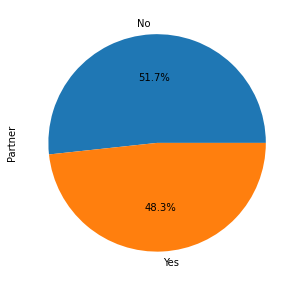

In [19]:
df['Partner'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

48.3% customer have their partners.

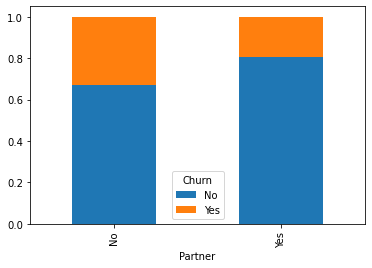

In [20]:
s= pd.crosstab(df.Partner, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=90)
plt.show()

Having partner make them less likey to leave the service.

<AxesSubplot:ylabel='Dependents'>

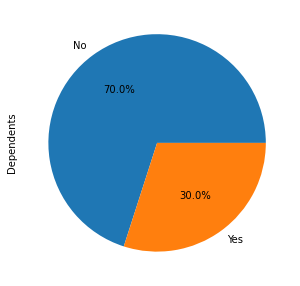

In [21]:
df['Dependents'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

30% of the subscribers have dependents

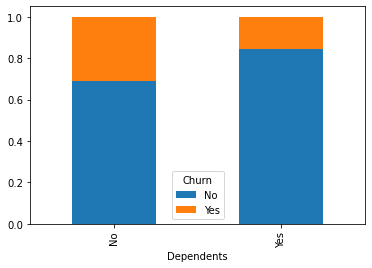

In [22]:
s= pd.crosstab(df.Dependents, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=90)
plt.show()

Having No dependents can make the subscriber leave the service.

<AxesSubplot:ylabel='PhoneService'>

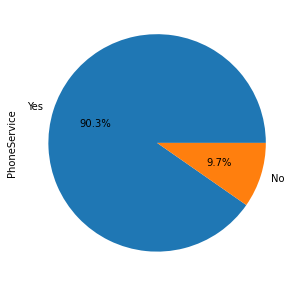

In [23]:
df['PhoneService'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

9.7% of the subscriber have no phone service.

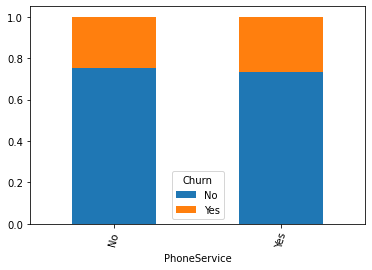

In [24]:
s= pd.crosstab(df.PhoneService, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having phone service do not have any impact on customer leaving the service.

<AxesSubplot:ylabel='InternetService'>

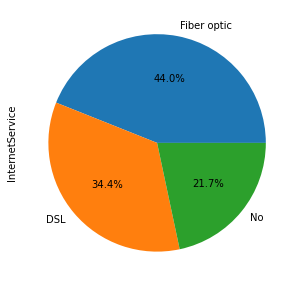

In [25]:
df['InternetService'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Around 44% of the users use Fibre optic.

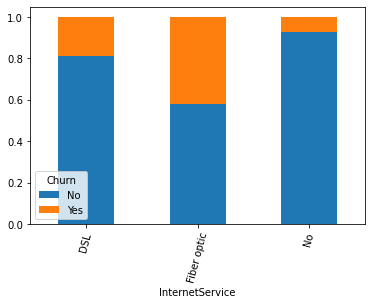

In [26]:
s= pd.crosstab(df.InternetService, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No internet service can make the user stay with the service.

<AxesSubplot:ylabel='StreamingTV'>

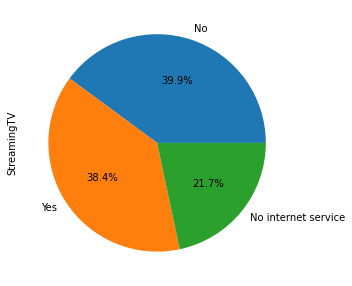

In [27]:
df['StreamingTV'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

39.9% of the user did not opt for the Streaming Tv service.

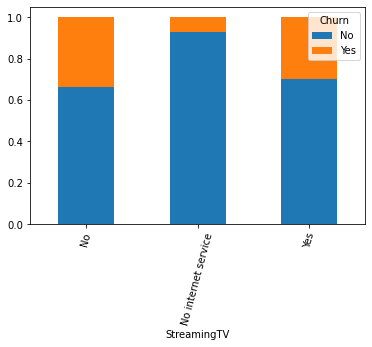

In [28]:
s= pd.crosstab(df.StreamingTV, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No internet service can make the user stay with the service.

<AxesSubplot:ylabel='StreamingMovies'>

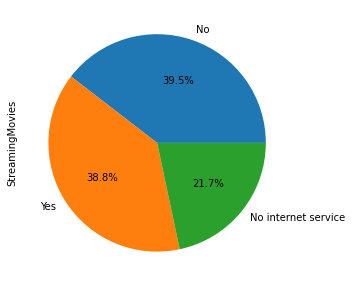

In [29]:
df['StreamingMovies'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

39.5% of the user did not opt for the Streaming Movies service.

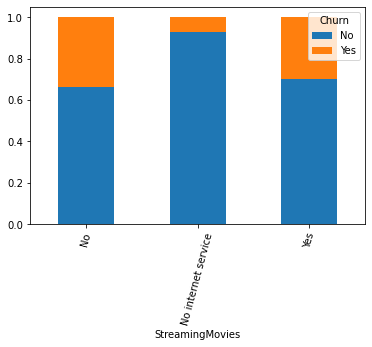

In [30]:
s= pd.crosstab(df.StreamingMovies, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Same like streaming TV, users with no internet service have less chance of leaving the service.

Is there something wrong with the internet service?

Churn is mrore among the users who use internet services like Fibre Optics and DSL.

The telecom company need to check if the quality of service needs to be improved.

<AxesSubplot:ylabel='Contract'>

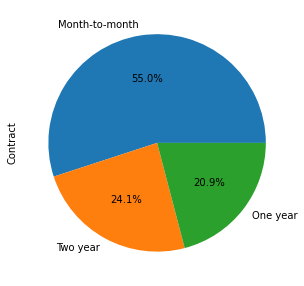

In [31]:
df['Contract'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

55 of the users have month to month contract.

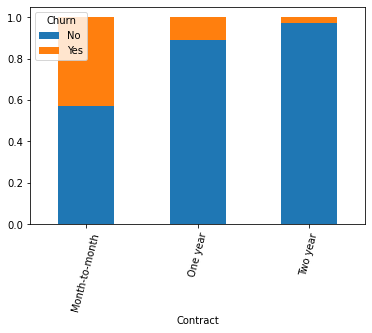

In [32]:
s= pd.crosstab(df.Contract, df.Churn,normalize='index')
s.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having a long contract can make the user stays with the services.

Company has to make the long plan more attractive.

Let's check for the outliers

SeniorCitizen        AxesSubplot(0.125,0.749828;0.0945122x0.130172)
tenure            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
MonthlyCharges    AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
dtype: object

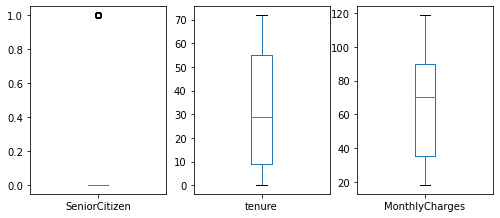

In [33]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

There are no outliers presents. Since senior citizen has only 2 variable,1 is showing as outliers which is not correct.

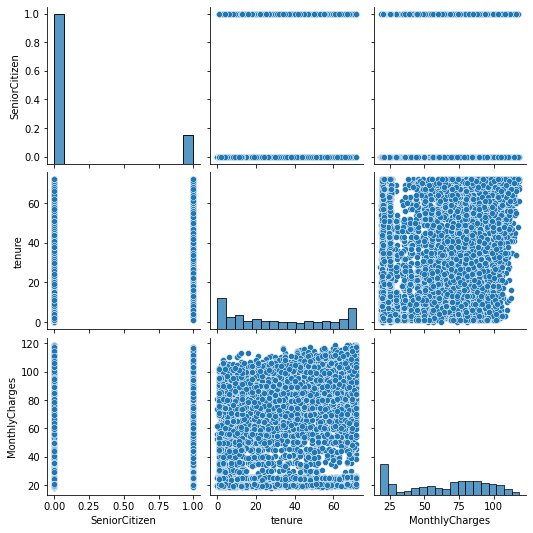

In [34]:
sns.pairplot(df)

In [35]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

skewness is not present in the dataset.

# Categorial Data : Label Encoding

We will change the categorical data using LabelEncoder

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [37]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


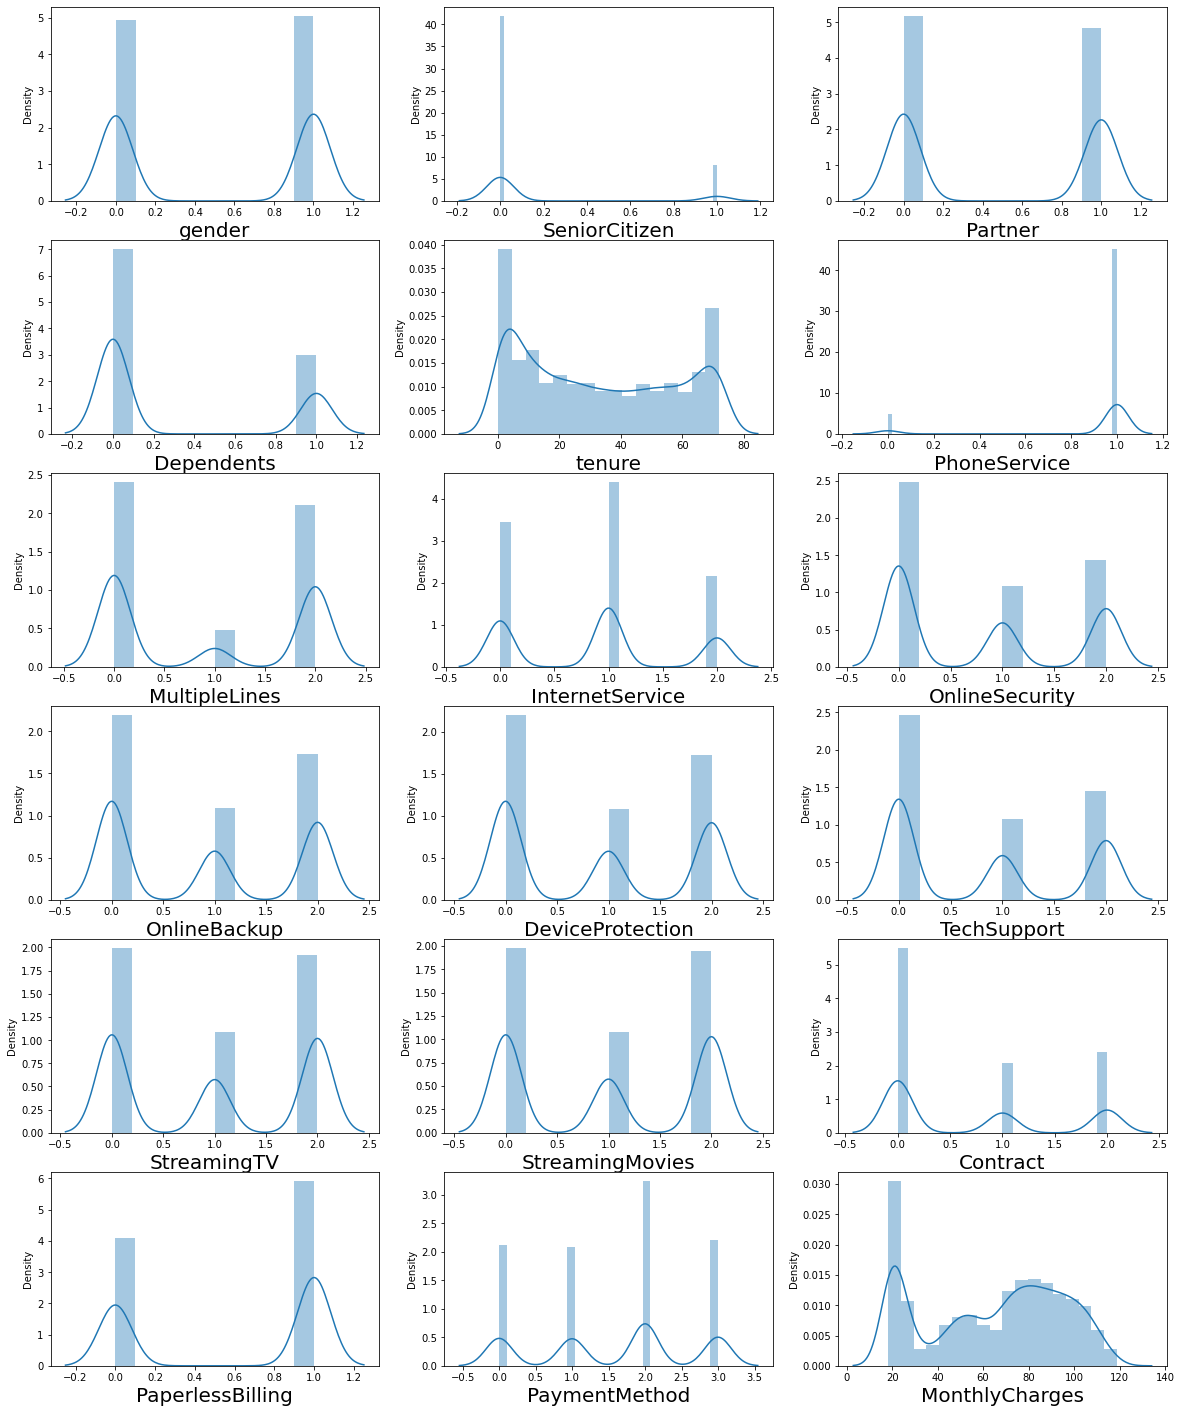

In [38]:
#Univariate Analysis
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.describe().columns:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

All data is categorical data

gender                 AxesSubplot(0.125,0.749828;0.0945122x0.130172)
SeniorCitizen       AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Partner             AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Dependents          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
tenure              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
PhoneService        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
MultipleLines       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
InternetService        AxesSubplot(0.125,0.593621;0.0945122x0.130172)
OnlineSecurity      AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
OnlineBackup        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
DeviceProtection    AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
TechSupport         AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
StreamingTV         AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
StreamingMovies     AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Contract            

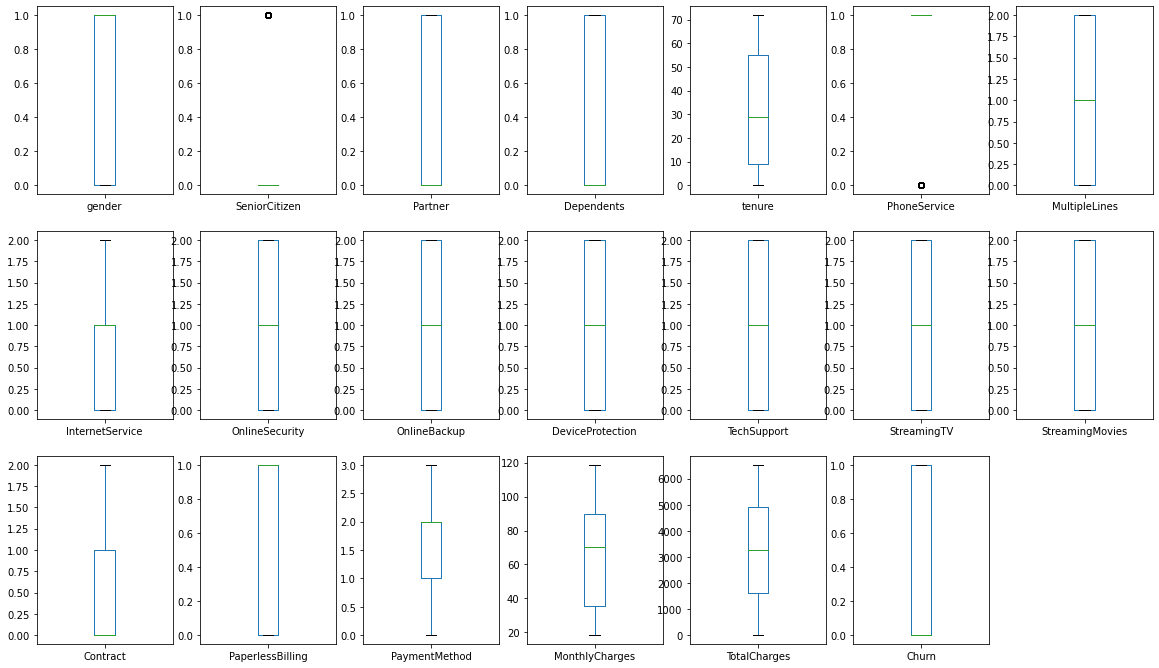

In [39]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

No outlier present as data is catogorical data

In [40]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

Some skewness is present after label encoding in column SeniorCitizen,Dependents,PhoneService +0.5 to -0.5

Since or data is imbalance we will now balance it using oversampling from SMOTE.

But before that we will split the data into input and target variable.

In [41]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']
y=pd.DataFrame(data=y)

In [42]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [61]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [44]:
x.shape,y.shape

((7043, 19), (7043, 1))

# SMOTE

Import the SMOTE library for over sampling the data.

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_1,y_1 = sm.fit_resample(x,y)

In [46]:
y_1.value_counts()

Churn
0        5174
1        5174
dtype: int64

We can see that the class is now balance.

In [47]:
print(x_1.shape)
print(y_1.shape)

(10348, 19)
(10348, 1)


We will bring our data to the standard scale using Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_1)
sc_x=pd.DataFrame(sc_x,columns=x_1.columns)

In [49]:
sc_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.855840,-0.390141,1.297808,-0.51917,-1.122069,-2.867545,0.112200,-1.226259,-0.757593,1.454647,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,0.454651,-1.342975,-0.398066
1,1.168442,-0.390141,-0.770530,-0.51917,0.260782,0.348730,-0.968849,-1.226259,1.726822,-0.887090,1.452285,-0.767942,-1.033057,-1.046156,0.670251,-1.190696,1.463168,-0.391593,-0.944820
2,1.168442,-0.390141,-0.770530,-0.51917,-1.080164,0.348730,-0.968849,-1.226259,1.726822,1.454647,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,1.463168,-0.500423,-1.633656
3,1.168442,-0.390141,-0.770530,-0.51917,0.721732,-2.867545,0.112200,-1.226259,1.726822,-0.887090,1.452285,1.706498,-1.033057,-1.046156,0.670251,-1.190696,-1.562382,-0.905901,-0.979551
4,-0.855840,-0.390141,-0.770530,-0.51917,-1.080164,0.348730,-0.968849,0.250446,-0.757593,-0.887090,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,0.454651,0.091119,-1.229511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.168442,-0.390141,-0.770530,-0.51917,-1.122069,0.348730,-0.968849,1.727152,0.484615,0.283778,0.281861,0.469278,0.097809,0.087536,-0.642593,-1.190696,0.454651,-1.690909,-0.931138
10344,1.168442,-0.390141,-0.770530,-0.51917,-0.577310,0.348730,0.112200,0.250446,0.484615,-0.887090,-0.888563,-0.767942,0.097809,0.087536,-0.642593,-1.190696,0.454651,0.794398,-1.493678
10345,-0.855840,-0.390141,-0.770530,-0.51917,-0.786832,-2.867545,-0.968849,-1.226259,1.726822,0.283778,-0.888563,-0.767942,1.228675,1.221228,-0.642593,0.839845,0.454651,0.127775,1.196413
10346,-0.855840,-0.390141,-0.770530,-0.51917,-0.996355,0.348730,-0.968849,0.250446,-0.757593,-0.887090,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,-0.553866,0.127158,-0.502786


In [62]:
y=y_1
x=sc_x
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.855840,-0.390141,1.297808,-0.51917,-1.122069,-2.867545,0.112200,-1.226259,-0.757593,1.454647,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,0.454651,-1.342975,-0.398066
1,1.168442,-0.390141,-0.770530,-0.51917,0.260782,0.348730,-0.968849,-1.226259,1.726822,-0.887090,1.452285,-0.767942,-1.033057,-1.046156,0.670251,-1.190696,1.463168,-0.391593,-0.944820
2,1.168442,-0.390141,-0.770530,-0.51917,-1.080164,0.348730,-0.968849,-1.226259,1.726822,1.454647,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,1.463168,-0.500423,-1.633656
3,1.168442,-0.390141,-0.770530,-0.51917,0.721732,-2.867545,0.112200,-1.226259,1.726822,-0.887090,1.452285,1.706498,-1.033057,-1.046156,0.670251,-1.190696,-1.562382,-0.905901,-0.979551
4,-0.855840,-0.390141,-0.770530,-0.51917,-1.080164,0.348730,-0.968849,0.250446,-0.757593,-0.887090,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,0.454651,0.091119,-1.229511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.168442,-0.390141,-0.770530,-0.51917,-1.122069,0.348730,-0.968849,1.727152,0.484615,0.283778,0.281861,0.469278,0.097809,0.087536,-0.642593,-1.190696,0.454651,-1.690909,-0.931138
10344,1.168442,-0.390141,-0.770530,-0.51917,-0.577310,0.348730,0.112200,0.250446,0.484615,-0.887090,-0.888563,-0.767942,0.097809,0.087536,-0.642593,-1.190696,0.454651,0.794398,-1.493678
10345,-0.855840,-0.390141,-0.770530,-0.51917,-0.786832,-2.867545,-0.968849,-1.226259,1.726822,0.283778,-0.888563,-0.767942,1.228675,1.221228,-0.642593,0.839845,0.454651,0.127775,1.196413
10346,-0.855840,-0.390141,-0.770530,-0.51917,-0.996355,0.348730,-0.968849,0.250446,-0.757593,-0.887090,-0.888563,-0.767942,-1.033057,-1.046156,-0.642593,0.839845,-0.553866,0.127158,-0.502786


# Training and Test Data

In [55]:
#Importing all the libraries for model fitting, cross validation and ROC AUC curve

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8270531400966183  on Random state 71


We can see that the best random state is maxRS. We will split the data with this random state

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [65]:
lg=LogisticRegression()
svc=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
abc=AdaBoostClassifier(n_estimators=100)
et = ExtraTreesClassifier()
xgb = XGBClassifier(eval_metric = 'logloss')


model=[lg,svc,knn,rfc,dtc,gnb,abc,et,xgb]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.8238325281803542
[[1245  317]
 [ 230 1313]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1562
           1       0.81      0.85      0.83      1543

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105

Accuracy score of SVC(probability=True)
0.8454106280193237
[[1285  277]
 [ 203 1340]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1562
           1       0.83      0.87      0.85      1543

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

Accuracy score of KNeighborsClassifier()
0.7906602254428341
[[1126  436]
 [ 214 1329]]
              precision    recall  f1-score   support

           0       0.84      0.72

RFC has perforwed well with test accuracy of 86%
Lets check the overfitting and underfitting of all the model.

# Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [66]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())

Mean Accuracy of LogisticRegression()
0.7959099006965021
Mean Accuracy of SVC(probability=True)
0.8160150181071861
Mean Accuracy of KNeighborsClassifier()
0.7889522115050095
Mean Accuracy of RandomForestClassifier()
0.838918799018406
Mean Accuracy of DecisionTreeClassifier()
0.785572857199562
Mean Accuracy of GaussianNB()
0.7819934482573438
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8147572049322527
Mean Accuracy of ExtraTreesClassifier()
0.8303194383153196
Mean Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_stat

We will check the ROC_AUC score to pick the final model

# ROC_AUC score


AUC Score of LogisticRegression()
0.8239973927107096




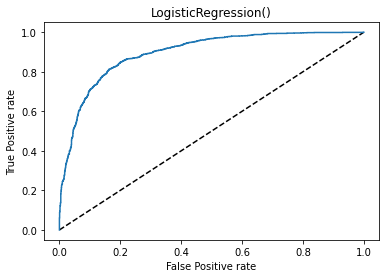



AUC Score of SVC(probability=True)
0.8455506799116741




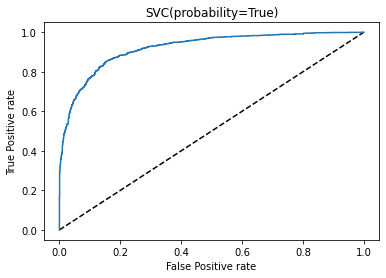



AUC Score of KNeighborsClassifier()
0.7910899083299656




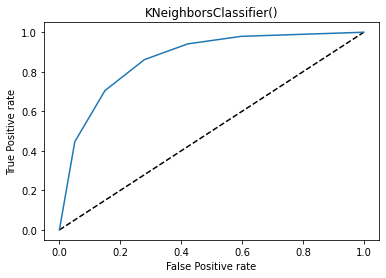



AUC Score of RandomForestClassifier()
0.860840705577956




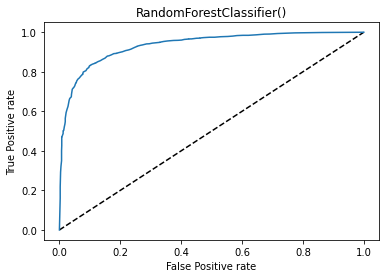



AUC Score of DecisionTreeClassifier()
0.7961729607006321




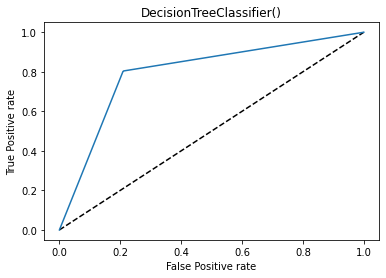



AUC Score of GaussianNB()
0.8020767034303862




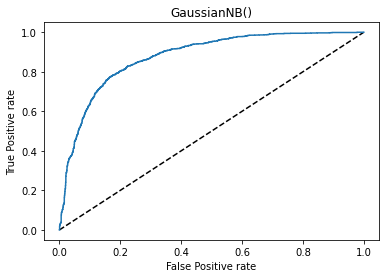



AUC Score of AdaBoostClassifier(n_estimators=100)
0.8471669586244267




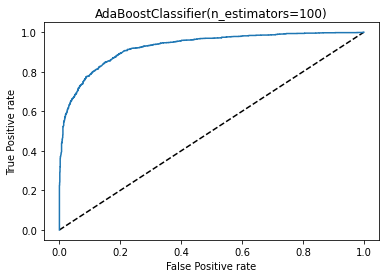



AUC Score of ExtraTreesClassifier()
0.8479341256992258




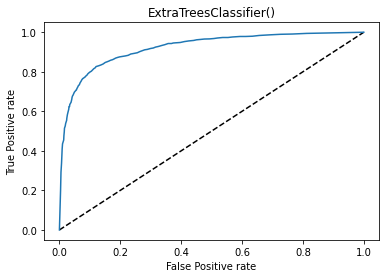



AUC Score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.8569994763846142




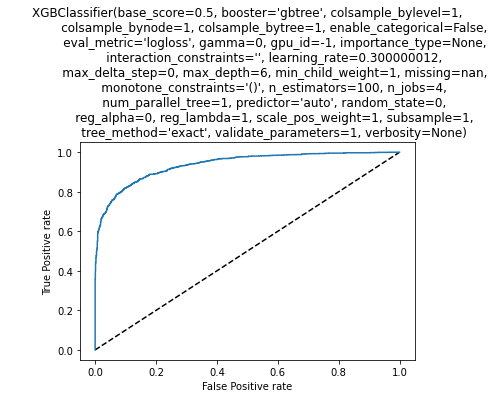

In [67]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')

Lets see all our model performance.

In [68]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','XGBClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.823833,0.795910,0.823997
1,SVC,0.845411,0.816015,0.845551
2,KNeighborsClassifier,0.790660,0.788952,0.791090
3,RandomForestClassifier,0.860870,0.838919,0.860841
4,DecisionTreeClassifier,0.796135,0.785573,0.796173
5,GaussianNB,0.801932,0.781993,0.802077
6,AdaBoostClassifier,0.847021,0.814757,0.847167
7,ExtraTreesClassifier,0.847987,0.830319,0.847934
8,XGBClassifier,0.857005,0.835151,0.856999


From the above metrics we can observe that:
1. DTC and KNN has performed well with least difference on CV score.
2. RFC has given us the best accuracy of 86% Cv score of 83% and ROC AUC score of 86%
3. Adaboost has also given best accuracy of 84% Cv score of 8% and ROC AUC score of 84%
4. Extratree has also given best accuracy of 84% Cv score of 83% and ROC AUC score of 84%
4. DTC has test accuracy of 79% CV score of 78% and ROC AUC score of 79%
So we will do Hyper tuning for DTC,RFC,Adaboost and Extratree

# HyperTuning of the model

Importing GridSearch to hypertune the model

In [69]:
from sklearn.model_selection import GridSearchCV

HyperTuning of RFC

In [70]:
parameters = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [5, 10, 20, 30, 50]}

GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

RFC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 86.15136876006441
Cross Validation Score 83.76621532958349
AUC ROC Score 86.15282100900933


AUC ROC Curve with Final Mod


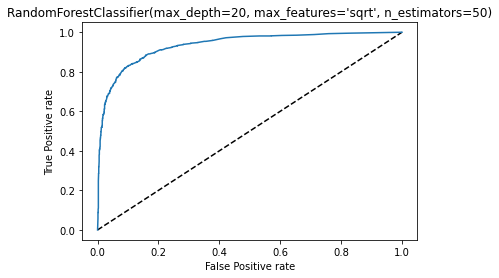

In [71]:
Finalmod=RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=50)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)

cvs=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))

print('RFC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc*100)
print('Cross Validation Score',cvs.mean()*100)
print('AUC ROC Score',auc_score*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

The model has not improved.
HyperTuning of DTC

In [72]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [73]:
GCV=GridSearchCV(dtc,params,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'random_state': 123}

DTC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 80.28985507246377
Cross Validation Score 78.18057219175172
AUC ROC Score 80.27453295748094


AUC ROC Curve with Final Mod


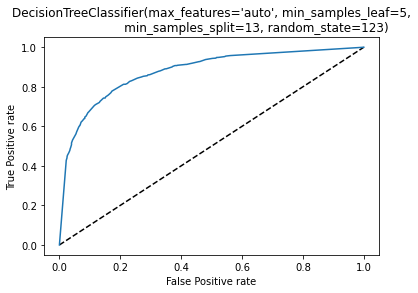

In [74]:
Finalmod2=DecisionTreeClassifier(max_features='auto', min_samples_leaf=5, min_samples_split= 13, random_state=123)
Finalmod2.fit(x_train,y_train)
pred2=Finalmod2.predict(x_test)
acc2=accuracy_score(y_test,pred2)

cvs2=cross_val_score(Finalmod2,x,y,cv=5)
y_pred_prob2=Finalmod2.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob2)
auc_score2=roc_auc_score(y_test,Finalmod2.predict(x_test))

print('DTC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc2*100)
print('Cross Validation Score',cvs2.mean()*100)
print('AUC ROC Score',auc_score2*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=DecisionTreeClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod2)
plt.show()

DTC has test accuracy incresed by .7 % of 79%, CV score of 78% and ROC AUC score of 80%

HyperTuning of ExtraTree

In [75]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [76]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 16,
 'min_samples_split': 7,
 'n_estimators': 300,
 'n_jobs': -2}

DTC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 86.05475040257649
Cross Validation Score 83.31204367205795
AUC ROC Score 86.06585604477036


AUC ROC Curve with Final Mod


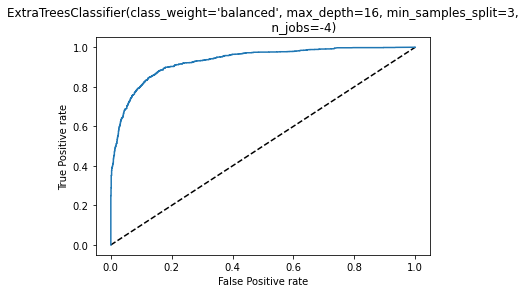

In [77]:
Finalmod3=ExtraTreesClassifier(class_weight= 'balanced',max_depth = 16,min_samples_split = 3, n_estimators = 100, n_jobs =-4)
Finalmod3.fit(x_train,y_train)
pred3=Finalmod3.predict(x_test)
acc3=accuracy_score(y_test,pred3)

cvs3=cross_val_score(Finalmod3,x,y,cv=5)
y_pred_prob3=Finalmod3.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob3)
auc_score3=roc_auc_score(y_test,Finalmod3.predict(x_test))

print('DTC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc3*100)
print('Cross Validation Score',cvs3.mean()*100)
print('AUC ROC Score',auc_score3*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=ExtraTreesClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod3)
plt.show()

Extratree has test accuracy incresed by .2 % of 84.5% CV score of 82.5% and ROC AUC score of 84.5%.
Since, DTC has test accuracy incresed by .7%, we will save DTC as the best model.

# Model Saving

In [78]:
import pickle
filename='CustomerChurn.pkl'
pickle.dump(Finalmod2,open(filename,'wb'))